## Интеллектуальный анализ данных – весна 2023
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html).

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования.

In [ ]:
X.isna().mean()

alcohol                         0.0
malic_acid                      0.0
ash                             0.0
alcalinity_of_ash               0.0
magnesium                       0.0
total_phenols                   0.0
flavanoids                      0.0
nonflavanoid_phenols            0.0
proanthocyanins                 0.0
color_intensity                 0.0
hue                             0.0
od280/od315_of_diluted_wines    0.0
proline                         0.0
dtype: float64

Пропусков данных нет

In [ ]:
(X.dtypes == "object")

alcohol                         False
malic_acid                      False
ash                             False
alcalinity_of_ash               False
magnesium                       False
total_phenols                   False
flavanoids                      False
nonflavanoid_phenols            False
proanthocyanins                 False
color_intensity                 False
hue                             False
od280/od315_of_diluted_wines    False
proline                         False
dtype: bool

Все признаки вещественные

**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

In [ ]:
from sklearn.model_selection import train_test_split

np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [ ]:
# масштабирование
scaler = StandardScaler()
scaler.fit(X_train[['alcohol', 'magnesium']])
X_train_scaled = scaler.transform(X_train[['alcohol', 'magnesium']])
X_test_scaled = scaler.transform(X_test[['alcohol', 'magnesium']])

# обучение и подсчет доли правильных ответов
clfs = []
nN = [1, 3, 5, 10, 15, 25]
for i in nN:
  clfs.append(KNeighborsClassifier(n_neighbors=i, p=2))
  clfs[-1].fit(X_train_scaled, y_train)
  train_pred = clfs[-1].predict(X_train_scaled)
  test_pred = clfs[-1].predict(X_test_scaled)
  print(f"n = {i}; train accuracy = {np.mean(y_train == train_pred)}; test accuracy = {np.mean(y_test == test_pred)}")

n = 1; train accuracy = 0.9919354838709677; test accuracy = 0.6666666666666666
n = 3; train accuracy = 0.8387096774193549; test accuracy = 0.6481481481481481
n = 5; train accuracy = 0.8064516129032258; test accuracy = 0.6851851851851852
n = 10; train accuracy = 0.8064516129032258; test accuracy = 0.7037037037037037
n = 15; train accuracy = 0.782258064516129; test accuracy = 0.6851851851851852
n = 25; train accuracy = 0.7258064516129032; test accuracy = 0.6851851851851852


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/).

In [ ]:
!pip install mlxtend==0.19.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 13.8 MB/s eta 0:00:00
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [ ]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов.
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново.
6. Построение графика может занять некоторое время – придётся немного подождать!

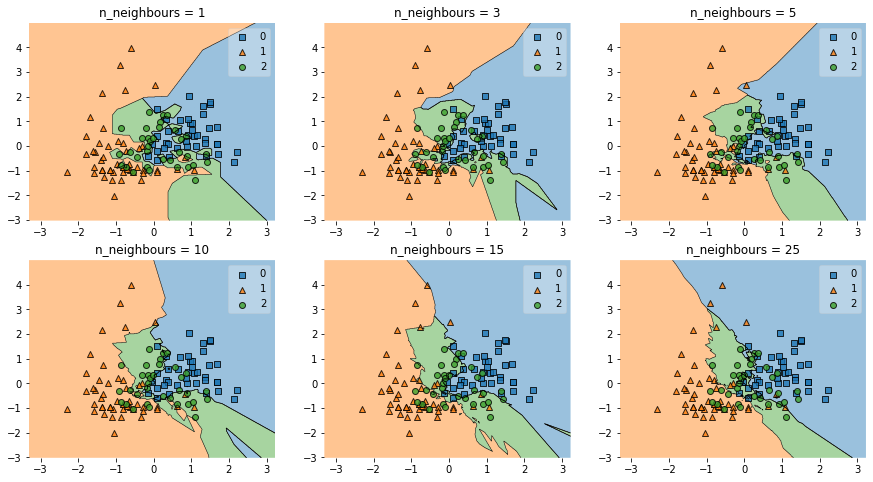

In [ ]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
gs = gridspec.GridSpec(2, 3)

fig = plt.figure(figsize=(15,8))

for clf, lab, grd in zip(clfs, map(lambda item: f"n_neighbours = {item}", nN), itertools.product([0, 1, 2], repeat=2)):
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X_train_scaled, y_train, clf)
    plt.title(lab)

plt.show()

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности.

**Ответ:** Лучший результат на тренировочный выборке ожидаемо при n = 1, при этом на тестовой выборе при том же n accuracy сильно хуже(наименьший из всех возможных). Лучший результат на тестовой выборке у моделей с n >= 10 - на графиках решающих поверхностей заметно, что плоскость разбивается на достоточно ровные, "не бугристые" по краям области. При этом и лучшее попадание объекта в "свою" область на графике, и лучшая accuracy у n = 10, поэтому будет считать 10 оптимальным числом соседей.

### Задание 2. KNN своими руками. 2 Балла

В данном задании мы попробуем реализовать алгоритм KNN своими руками. В данном случае мы попробуем сделать KNN для классификации.

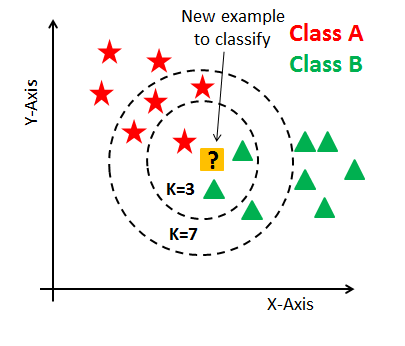

In [ ]:
import numpy as np
from collections import Counter

class KNN:
    def __init__(self, k:int):
        self.k = k

    def fit(self, X, y):
      self.X_train = X
      self.y_train = y

    def predict(self, X):
      y_pred = []

      from scipy.spatial.distance import cdist
      distance = cdist(X, self.X_train)

      for i in range(X.shape[0]):
        k_nearest_indx = np.argsort(distance[i])[:self.k]
        k_nearest_class = self.y_train[k_nearest_indx]
        most_common = Counter(k_nearest_class).most_common(1)[0][0]
        y_pred.append(most_common)

      return y_pred

In [ ]:
def test_knn(KNN):
  knn = KNN(k=1)
  X_train =  np.array([[1, 1], [2, 2]])
  y_train =  np.array([0, 1])
  X_test =  np.array([[1.5, 1.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [0]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[9.5, 9.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5.5, 5.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[15, 15]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5, 5], [2, 2]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1, 0]

In [ ]:
# Если тесты эти пройдены, то все верно!
test_knn(KNN)

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2021/homeworks/hw04-knn_linreg/data/diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.1 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их.

In [ ]:
data.isna().mean()

Unnamed: 0    0.0
carat         0.0
cut           0.0
color         0.0
clarity       0.0
depth         0.0
table         0.0
price         0.0
x             0.0
y             0.0
z             0.0
dtype: float64

Пропущенных данных нет

**Задача 3.2 (0.1 балла)** Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [ ]:
del data['Unnamed: 0']
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


**Задача 3.3 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [ ]:
cat_features_mask = (data.dtypes == "object").values
data_real = data[data.columns[~cat_features_mask]]
data_real.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


Признаки carat, x, y, z больше всего коррелируют с целевой переменной price

**Задача 3.4 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [ ]:
data_dum = pd.get_dummies(data, drop_first=True)
data_dum.head()

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,0,...,0,0,1,0,0,1,0,0,0,0


**Задача 3.5 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [ ]:
del data_dum['price']

In [ ]:
from sklearn.model_selection import train_test_split

y = data['price']
X_train, X_test, y_train, y_test = train_test_split(data_dum, y, test_size=0.3, random_state = 171)

**Задача 3.6 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train[['carat','depth','table','x','y','z']])
X_train_scaled = X_train
X_train_scaled[['carat','depth','table','x','y','z']] = scaler.transform(X_train[['carat','depth','table','x','y','z']])
X_test_scaled = X_test
X_test_scaled[['carat','depth','table','x','y','z']] = scaler.transform(X_test[['carat','depth','table','x','y','z']])

**Задача 3.7 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression().fit(X_train_scaled, y_train)
print(f"Train: {mean_squared_error(y_train, lr.predict(X_train_scaled))}")
print(f"Test: {mean_squared_error(y_test, lr.predict(X_test_scaled))}")

Train: 1280873.6788186703
Test: 1268249.3759228205


**Задача 3.8 (0.2 балла)** Изучите документацию модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [ ]:
lr.coef_

array([ 5312.64317298,   -90.05070649,   -69.2139011 , -1155.94670332,
          78.37764321,   -48.25869372,   590.84885283,   834.12555499,
         780.99957131,   738.04289755,  -223.01233448,  -271.37304524,
        -488.21743583,  -979.74231753, -1443.2084113 , -2364.19432659,
        5392.61024301,  3707.25922986,  2743.74704385,  4630.39652791,
        4319.12233638,  5060.03297913,  4982.32734763])

Наибольшие по модулю оценки у 'carat' и 'x' (среди вещественных переменых).

**Задача 3.9 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом.

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией.

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [ ]:
from sklearn.linear_model import Lasso, Ridge

lasso = Lasso(10).fit(X_train_scaled, y_train)
ridge = Ridge(10).fit(X_train_scaled, y_train)

np.set_printoptions(suppress=True)
print('Lasso coef: ', lasso.coef_)
print('Ridge coef: ', ridge.coef_)

Lasso coef:  [ 4730.81977242  -153.39638159  -115.34486185  -651.71570099
    -0.           -20.816132      -0.           152.89897494
    70.30825292    79.96897093     0.            -0.
  -117.82622983  -604.76455421  -973.41988623 -1754.08740338
  1317.71920437     1.47076037  -797.44848172   837.7069818
   596.57092332  1173.80819624  1162.23140727]
Ridge coef:  [ 5260.10901593   -93.09431086   -71.83110544 -1112.97605168
    76.01755377   -49.13907192   617.19837121   863.9096018
   806.63315614   769.57240069  -210.28753635  -258.58524428
  -470.14526837  -962.84393861 -1418.33650908 -2326.08644197
  4798.43264542  3158.18431825  2203.00347979  4072.40182384
  3766.80192595  4488.12919117  4417.87257734]


Заметно, что при Lasso-регуляризации веса стали заметно меньше(по модулю), а некоторые занулились. Это говорит о том, что некоторые признаки были очень похожи друг на друга, имела место мультиколлинеарность.

**Задача 3.10 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов.

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

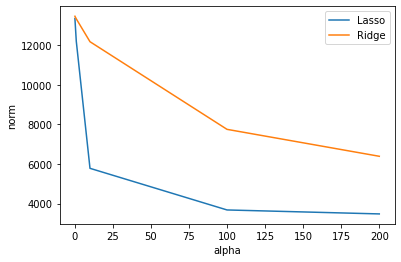

In [ ]:
alphas = [0.1, 1, 10, 100, 200]

lasso_norm = []
ridge_norm = []

for a in alphas:
  lasso = Lasso(a).fit(X_train_scaled, y_train)
  lasso_norm.append(np.linalg.norm(lasso.coef_))

  ridge = Ridge(a).fit(X_train_scaled, y_train)
  ridge_norm.append(np.linalg.norm(ridge.coef_))

plt.plot(alphas, lasso_norm, label='Lasso')
plt.plot(alphas, ridge_norm, label='Ridge')
plt.xlabel('alpha')
plt.ylabel('norm')
plt.legend()
plt.show()

Lasso-регрессия явно агрессивнее уменьшает веса. Lasso-регрессия эффективна в задаче отбора признаков, тк она позволяет занулять("выкидывать") неважные признаки за счет L1-регуляризации, где берутся абсолютные значения в функционале ошибки. Ridge-регрессия использует L2-регуляризацию, которая ограничивает, но не зануляет признаки.

**Задача 3.11 (0.5 балла)**
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке.

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`.

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество.

In [ ]:
from sklearn.linear_model import LassoCV

lasso_cv = LassoCV(alphas=alphas, cv=5, max_iter=100000)
lasso_cv.fit(X_train_scaled, y_train)

mean_errors = np.mean(lasso_cv.mse_path_, axis = 1)
alpha = lasso_cv.alphas_[np.argmin(mean_errors)] # чем меньше mse, тем лучше альфа?
print(alpha)

1.0


In [ ]:
# в документации написано, что .alpha_ без плясок с бубном выдает оптимальное значение alpha. наверно, можно найти эту оптимальную альфу так и сравнить результаты?

lasso_cv.alpha_


1.0

**Задача 3.12 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [ ]:
lasso = Lasso(alpha).fit(X_train_scaled, y_train)
lasso.coef_

array([ 5253.54350969,  -100.14174577,   -75.56365717, -1040.54993684,
           0.        ,   -40.6573752 ,   491.43749641,   736.56347638,
         678.75025793,   645.70970065,  -168.89876781,  -218.25101642,
        -430.10816647,  -921.89582589, -1374.44065083, -2281.03033972,
        4838.55602158,  3193.69425014,  2234.71064462,  4106.20930452,
        3802.50394053,  4524.85791558,  4454.86188912])

Занулился только коэффициент признака 'y'(ширины), возможно из-за его связи table(отношение ширины вершины бриллианта к самой широкой его части).

**Задача 3.13 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [ ]:
lasso_pred = lasso.predict(X_test_scaled)
lasso_mse = mean_squared_error(y_test, lasso_pred)
print("Lasso MSE: ", lasso_mse)

Lasso MSE:  1269705.128815983


In [ ]:
print(f"LinReg MSE: {mean_squared_error(y_train, lr.predict(X_train_scaled))}")

LinReg MSE: 1280873.6788186703


Ошибка огромная что для Lasso, что для обычной линейной регрессии, однако для Lasso она все же меньше, поэтому использовать для предсказаний лучше ее. Lasso-регуляризация отбрасывает незначимые признаки, чем помогает избежать переобучения и улучшает "предсказывающую" способность модели.